### This Notebook Created by Ehsan Khoapanah Aghdam (`engtekh@gmail.com`) for Analysis of Signals and Systems by Dr. Hadi Seyed-Arabi
<p align="center">
    <img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/University_of_tabriz_vector_blue_org.svg/1920px-University_of_tabriz_vector_blue_org.svg.png' alt="drawing" width="200"/>
</p>

## Four common filters are: 
>> 1. Low-pass filter, passes signals with a frequency lower than a certain cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency.
>> 2. High-pass filter, passes signals with a frequency higher than a certain cutoff frequency and attenuates signals with frequencies lower than the cutoff frequency.
>> 3. A band-pass filter can be formed by cascading a high-pass filter and a low-pass filter.
>> 4. A band-reject filter is a parallel combination of low-pass and high-pass filters.
>> <p align="center">
>> <img src = filters.jpg alt="drawing" width="550"/>
>> </p>
>> <p align="center">
>> <img src = LowPass_Butter.png alt="drawing" width="400"/>
>> </p>

## Nyquist Frequency
>> ### The term Nyquist is often used to describe the Nyquist sampling rate or the Nyquist frequency.
>>### The Nyquist rate or frequency is the minimum rate at which a finite bandwidth signal needs to be sampled to retain all the information. If a time series is sampled at regular time intervals' $dt$, then the Nyquist rate is just $1/(2 dt)$.

In [29]:
import numpy as np
from scipy.signal import butter, filtfilt, lfilter, freqz
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (18,4)

# Filter requirements
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 3.6      # desired cutoff frequency of the filter ,slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequencyorder = 2      
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)

In [30]:
# sin wave
sig = np.sin(1.2*2*np.pi*t)
# Lets add some noise
noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = sig + noise

### Filter Implementation

In [31]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

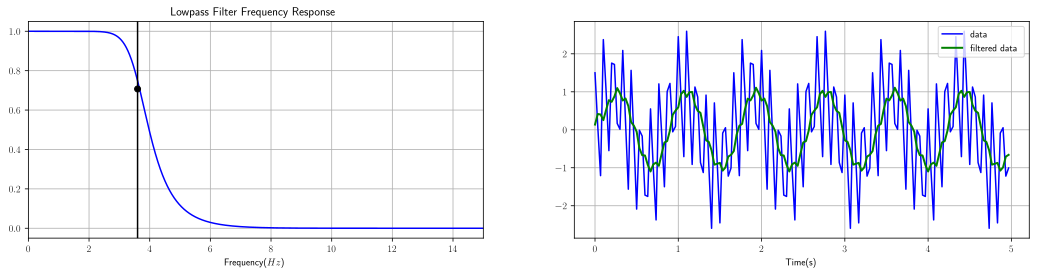

In [32]:
# Plot the frequency response.
plt.subplot(1, 2, 1)
w, h = freqz(b, a, worN=8000)
plt.subplot(1, 2, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency($Hz$)')
plt.grid()

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)
plt.subplot(1, 2, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time(s)')
plt.grid()
plt.legend()